In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


# Reading CSV file

In [3]:
Stock = pd.read_csv('D:\Desktop\ML Project\ml_stoc_prediction\NSE-ICICIBANK.csv', index_col='Date',parse_dates=True)
Stock.drop(['series','VALUE'], inplace=True, axis=1)
df_Stock = Stock
df_Stock

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,No of trades
Date,,,,,,,,,,,
2019-04-24,397.10,402.65,393.45,396.50,401.60,401.10,397.78,411.0,256.50,11397163,143131
2019-04-25,400.90,402.40,394.30,401.10,395.65,395.40,398.27,411.0,256.50,16524091,116341
2019-04-26,400.00,408.00,394.25,395.40,407.20,407.20,402.32,411.0,256.50,14286163,132349
2019-04-30,407.75,409.80,403.30,407.20,405.75,407.50,407.21,411.0,256.50,19375553,226795
2019-05-02,403.70,405.00,394.40,407.50,394.75,395.55,399.85,411.0,256.50,16572948,190606
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,574.60,577.75,564.10,575.20,565.05,566.95,569.62,679.4,285.55,24045008,259366
2021-04-19,550.00,562.30,534.40,566.95,560.40,559.75,547.46,679.4,285.55,28526176,301440
2021-04-20,565.20,572.65,552.60,559.75,558.40,559.10,562.91,679.4,285.55,24425842,265471


In [4]:
df_Stock.tail(5) #Last five row

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,No of trades
Date,,,,,,,,,,,
2021-04-16,574.6,577.75,564.10,575.20,565.05,566.95,569.62,679.4,285.55,24045008,259366
2021-04-19,550.0,562.30,534.40,566.95,560.40,559.75,547.46,679.4,285.55,28526176,301440
2021-04-20,565.2,572.65,552.60,559.75,558.40,559.10,562.91,679.4,285.55,24425842,265471
2021-04-22,552.0,580.60,546.90,559.10,578.40,579.20,570.14,679.4,285.55,34942633,340989
2021-04-23,569.9,580.50,567.05,579.20,567.50,569.95,572.81,679.4,285.55,33749097,364665


In [5]:
df_Stock.shape #No. of columns and row

(495, 11)

In [6]:
df_Stock.columns #Name of columns

Index(['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap', '52W H',
       '52W L', 'VOLUME', 'No of trades '],
      dtype='object')

# Ploting Closed Price v/s Date

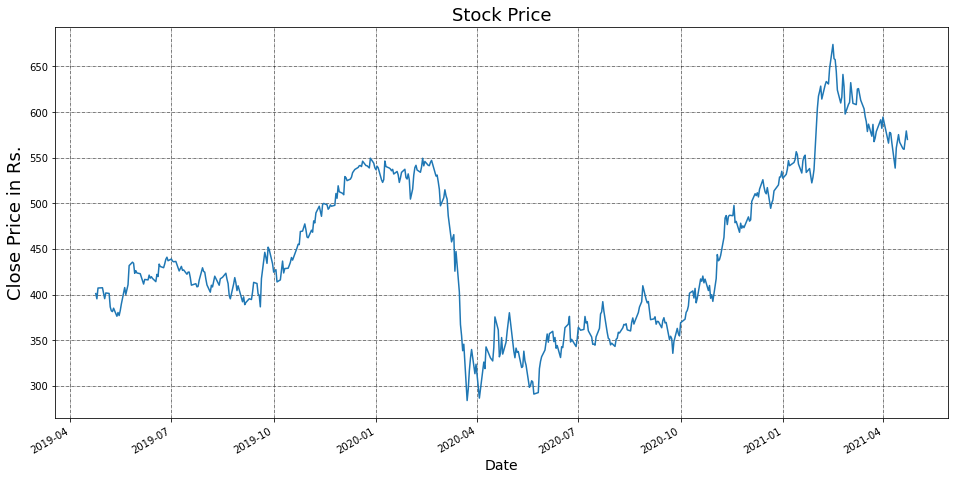

In [7]:
df_Stock['close'].plot(figsize=(16, 8))
plt.title("Stock Price", fontsize=18)
plt.ylabel('Close Price in Rs.', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Splitting dataset for training , validation and test sets

In [8]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['close'], axis=1)
    target = df_Stock['close']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a split for train and testing
    train_split = int(data_len * 0.80)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.2)
    print('Validation Set length - ', str(int(data_len * 0.2)))

   

    # Splitting features and target into train, validation and test samples 
    X_train, X_val = features[:train_split], features[train_split:val_split]
    Y_train, Y_val = target[:train_split], target[train_split:val_split]

    #print shape of samples
    print(X_train.shape, X_val.shape)
    print(Y_train.shape, Y_val.shape)
    
    return X_train, X_val, Y_train, Y_val

In [9]:
X_train, X_val,Y_train, Y_val = create_train_test_set(df_Stock)

Historical Stock Data length is -  495
Training Set length -  396
Validation Set length -  99
(396, 10) (99, 10)
(396,) (99,)


# Inserting X_train & Y_train in Our model

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [11]:
print('LR Coefficients: \n', lr.coef_) 
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-6.65124676e-02  6.51282935e-02  6.96813039e-02 -1.94344663e-02
  8.80548317e-01  7.25416703e-02  1.58904633e-03 -5.40201242e-03
 -6.06769515e-09  6.67202980e-07]
LR Intercept: 
 -0.17278723840178145


In [12]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9997571311731819


In [13]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)

# Calculating its performance

In [14]:
#  Compute mean absolute percentage error (MAPE)
def get_mape(y_true, y_pred):     
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
# first 88% of dataset
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

# rest 20% of dataset
print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')



Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.2
Training Mean Squared Error: 1.12
Training RMSE:  1.06
Training MAE:  0.79
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.17
Validation Mean Squared Error: 1.12
Validation RMSE:  1.2
Validation MAE:  0.94
 


In [17]:
rms=np.sqrt(np.mean(np.power((Y_val-Y_val_pred),2)))
rms

1.203277372108109

# Plotting Actual v/s Predicted graph

In [18]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred

,Actual,Predicted
Date,,
2020-11-26,475.30,476.263362
2020-11-27,473.35,474.350150
2020-12-01,485.10,484.370849
2020-12-02,480.45,479.026244
2020-12-03,481.85,482.356682
...,...,...
2021-04-16,566.95,565.804757
2021-04-19,559.75,558.824340
2021-04-20,559.10,559.256109


<AxesSubplot:xlabel='Date'>

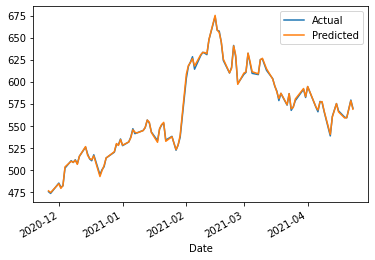

In [19]:
df_pred[['Actual', 'Predicted']].plot()

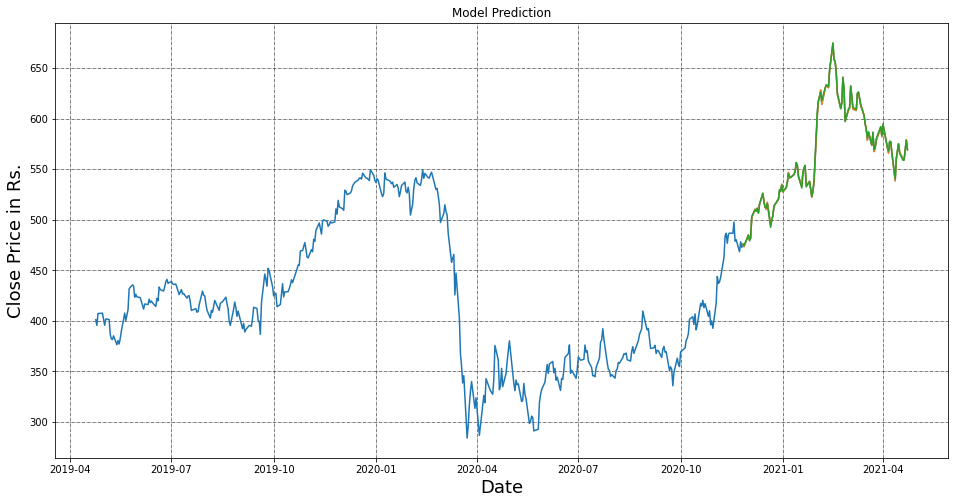

In [20]:
train = df_Stock[: df_Stock.shape[0]]
valid = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
valid['Predictions'] = Y_val_pred
plt.figure(figsize = (16,8))
plt.title ('Model Prediction')
plt.xlabel ("Date" ,fontsize=18)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.ylabel ("Close Price in Rs." ,fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['Actual', 'Predictions']])
plt.show()


In [18]:
valid

,Actual,Predictions
Date,,
2020-11-26,475.30,476.263362
2020-11-27,473.35,474.350150
2020-12-01,485.10,484.370849
2020-12-02,480.45,479.026244
2020-12-03,481.85,482.356682
...,...,...
2021-04-16,566.95,565.804757
2021-04-19,559.75,558.824340
2021-04-20,559.10,559.256109
